# DJ Khalid-God Did

   The term "text analysis" refers to the process of computationally analyzing texts. Text analytics is the use of a variety of methods and procedures to turn textual information into data that can then be mined for insights, trends, and patterns. As an illustration, text analysis aids in translating a text into data language.
 This project's goal is to develop structured data from the lyrics of "God Did," the second song from DJ Khalid's 13th studio album, God Did, which also features Jay-Z, Rick-Ross, Lil' Wayne, John Legend, and Fridayy.

Importing Necessary Libraries

In [2]:
import os
import pandas as pd
from collections import Counter

#wordcloud
from PIL import Image
import numpy
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from wordcloud import WordCloud

#NLP Summarizer
import nltk
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

#Sentimental Analysis
from textblob import TextBlob

Importing Dataset

In [4]:
God_Did = pd.read_csv(r"C:\Users\lolad\Desktop\God-Did Text Analysis\Dataset\God Did Lyrics.txt",header = None)
God_Did = God_Did.rename(columns = {0:"Lines"})
God_Did

,Lines
0,[Intro: DJ Khaled]
1,It breaks my heart
2,They ain't believe in us
3,We the Best Music
4,They played themselves
...,...
180,He did it yeah yeah
181,God did
182,God did
183,God did


# Cleaning

In [5]:
#Removing Stopwords
stopwords = list(get_stop_words("english"))

#Creating my own stopwords
custom_stop_words = ["Chorus","Oh", "huh"]

#Adding custom_stop_words to stopwords list
final_stop_words = stopwords + custom_stop_words
final_stop_words

["shouldn't",
 'aside',
 'on',
 'asking',
 'see',
 'hi',
 'whenever',
 'definitely',
 "it'll",
 'used',
 'w',
 're',
 'also',
 'come',
 'thereupon',
 "wasn't",
 'is',
 'neither',
 'soon',
 "when's",
 'relatively',
 'sensible',
 'near',
 "he'd",
 'appropriate',
 "we'll",
 'are',
 'useful',
 "haven't",
 'way',
 'nd',
 'although',
 'nothing',
 'seems',
 'able',
 'goes',
 'again',
 'do',
 "didn't",
 'reasonably',
 "you're",
 'normally',
 'least',
 'nevertheless',
 'lest',
 "don't",
 'for',
 'your',
 'ought',
 'their',
 "a's",
 'myself',
 "here's",
 'using',
 'k',
 'new',
 "there's",
 'less',
 'everything',
 'in',
 "let's",
 'still',
 'toward',
 'elsewhere',
 'whereupon',
 'qv',
 'against',
 'it',
 'anyhow',
 "that's",
 'former',
 'never',
 'ever',
 'did',
 'hardly',
 'why',
 'particular',
 'allow',
 'more',
 'wish',
 'nine',
 'than',
 'whole',
 'hopefully',
 "we've",
 'am',
 'each',
 'need',
 'immediate',
 'think',
 'if',
 'yours',
 'latterly',
 'zero',
 'cause',
 'hence',
 'containing',
 

In [6]:
#Removing stopwords from the dataset
God_Did['Lines'] = God_Did['Lines'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stop_words)]))
God_Did

,Lines
0,[Intro: DJ Khaled]
1,It breaks heart
2,They
3,We Best Music
4,They played
...,...
180,He yeah yeah
181,God
182,God
183,God


# Exploration

In [7]:
#Lines Count
God_Did["Lines"].count()

185

In [8]:
#Unique Lines Count
God_Did["Lines"].nunique()

158

# WordCloud

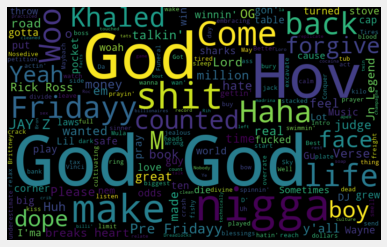

In [9]:
text = " ".join(i for i in God_Did.Lines)
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 150).generate(text)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Sentimental Analysis

In [10]:
def getSubjectivity(lyrics):
    return TextBlob(lyrics).sentiment.subjectivity
def getPolarity(lyrics):
    return TextBlob(lyrics).sentiment.polarity

God_Did["Subjectivity"] = God_Did["Lines"].apply(getSubjectivity)
God_Did["Polarity"] = God_Did["Lines"].apply(getPolarity)
God_Did

,Lines,Subjectivity,Polarity
0,[Intro: DJ Khaled],0.0,0.0
1,It breaks heart,0.0,0.0
2,They,0.0,0.0
3,We Best Music,0.3,1.0
4,They played,0.0,0.0
...,...,...,...
180,He yeah yeah,0.0,0.0
181,God,0.0,0.0
182,God,0.0,0.0
183,God,0.0,0.0


In [11]:
def rev(polarity):
    if polarity > 0:
        return "Postive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"
God_Did["Review"] = God_Did["Polarity"].apply(rev)
God_Did

,Lines,Subjectivity,Polarity,Review
0,[Intro: DJ Khaled],0.0,0.0,Neutral
1,It breaks heart,0.0,0.0,Neutral
2,They,0.0,0.0,Neutral
3,We Best Music,0.3,1.0,Postive
4,They played,0.0,0.0,Neutral
...,...,...,...,...
180,He yeah yeah,0.0,0.0,Neutral
181,God,0.0,0.0,Neutral
182,God,0.0,0.0,Neutral
183,God,0.0,0.0,Neutral


In [12]:
#Filtering
Positive_Lines = God_Did[God_Did["Review"] == "Postive"]
Positive_Lines

,Lines,Subjectivity,Polarity,Review
3,We Best Music,0.300000,1.000000,Postive
6,You embracing love,0.600000,0.500000,Postive
7,More love blessings life,0.550000,0.500000,Postive
9,You win watch win,0.400000,0.800000,Postive
21,God (God great),0.750000,0.800000,Postive
27,A tub full money I relax,0.550000,0.350000,Postive
31,Better listen I I put time,0.500000,0.500000,Postive
34,Dope boy big calm biggest boss,0.425000,0.150000,Postive
36,Or I buy bank I money's safe (Maybach Music),0.500000,0.500000,Postive
92,Not cap table boy live,0.500000,0.136364,Postive


In [13]:
Negative_Lines = God_Did[God_Did["Review"] == "Negative"]
Negative_Lines

,Lines,Subjectivity,Polarity,Review
30,Wrong side petition divine winnin',0.900000,-0.500000,Negative
33,So leave dark swimmin' sharks,0.400000,-0.150000,Negative
49,They tired winnin' dead sleep,0.550000,-0.300000,Negative
50,Don't wan' ring? You play D',0.150000,-0.200000,Negative
56,Please hate hate,0.900000,-0.800000,Negative
62,I fucked world I I practiced safe sex,0.600000,-0.050000,Negative
81,I left dope game record clean,0.366667,-0.011111,Negative
87,"Then ""Fuck it"" dope public",0.333333,-0.200000,Negative
88,Out mud gotta face make shit,0.800000,-0.200000,Negative
94,We pushin' Fenty Fentanyl shit legitimate (Woo),0.800000,-0.200000,Negative


# Text Summarization

In [14]:
nltk.download("punkt")
lsa = LsaSummarizer(Stemmer("english"))
lsa.stop_words = final_stop_words
parser = PlaintextParser.from_string(' '.join(God_Did["Lines"]), Tokenizer("english"))
lsa_summary = lsa(parser.document, 2)
lsa_summary

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lolad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(<Sentence: You play D' Nigga God His thing He made With odds stacked I crack Da Vinci I God judge I Brittney They smell blood sharks start actin' fishy Well I'ma act ass gon' kiss Please hate hate Before overrate gon' underestimate Funeral wake bury excavate But I'm cultivating replicate nigga face facts Dreadlocks face tats I'm apex I made culture twin?>,
 <Sentence: Hov real nigga's dream My goal make real nigga feel Sometimes make fake nigga hate life Never intention consequences life The play life I'm careful sentences jail bars I (Woo) I wanted state custodian (Come on) The laws draconian (Come Hov) For married life (Come on) holy matrimony (Come on) Somehow I'll out-fox box throw (Come on) With great ceremony Folk 'nem told highly Caddy spoke And bloke 'nem London Harrow Road Weston Inn I speakin' souls men Those willin' die existence cold world chose Kickin' snow frozen Timb (Woo) Back turnpike toll 'em Lot fallen soldiers roads sin For make laws I'ma smoke I lawyers shooters W